In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install catboost
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import GroupShuffleSplit, train_test_split
from sklearn.metrics import fbeta_score,confusion_matrix,accuracy_score,f1_score,classification_report
pd.set_option("display.max_columns",None)

     |████████████████████████████████| 65.8MB 64kB/s 


In [ ]:
cd /content/drive/MyDrive/Datasets/IsBankasi/

/content/drive/MyDrive/Datasets/IsBankasi


In [ ]:
df_train=pd.read_csv("train.csv").drop(columns="tarih")
df_test=pd.read_csv("test.csv").drop(columns="tarih")
df_exp=pd.read_csv("monthly_expenditures.csv")
df_exp.tarih=pd.to_datetime(df_exp.tarih.astype(str),format='%Y%m%d').dt.month
#df_exp["ge10K"]=(df_exp.aylik_toplam_tutar > 10000).astype(int)
print("train: ",df_train.shape)
print("test: ",df_test.shape)
print("exp:",df_exp.shape)

train:  (60000, 7)
test:  (40000, 6)
exp: (932144, 5)


In [ ]:
df_train["yas"] = df_train["yas"].mask(df_train["yas"] > 45, 7)
df_train["yas"] = df_train["yas"].mask(df_train["yas"] > 40, 6)
df_train["yas"] = df_train["yas"].mask(df_train["yas"] > 35, 5)
df_train["yas"] = df_train["yas"].mask(df_train["yas"] > 30, 4)
df_train["yas"] = df_train["yas"].mask(df_train["yas"] > 25, 3)
df_train["yas"] = df_train["yas"].mask(df_train["yas"] > 20, 2)
df_train["yas"] = df_train["yas"].mask(df_train["yas"] > 10, 1)

In [ ]:
df_test["yas"] = df_test["yas"].mask(df_test["yas"] > 45, 7)
df_test["yas"] = df_test["yas"].mask(df_test["yas"] > 40, 6)
df_test["yas"] = df_test["yas"].mask(df_test["yas"] > 35, 5)
df_test["yas"] = df_test["yas"].mask(df_test["yas"] > 30, 4)
df_test["yas"] = df_test["yas"].mask(df_test["yas"] > 25, 3)
df_test["yas"] = df_test["yas"].mask(df_test["yas"] > 20, 2)
df_test["yas"] = df_test["yas"].mask(df_test["yas"] > 10, 1)

In [ ]:
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] < 20, 0)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 300, 16)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 280, 15)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 260, 14)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 240, 13)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 230, 12)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 220, 11)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 210, 10)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 190, 9)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 170, 8)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 150, 7)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 130, 6)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 110, 5)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 90, 4)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 70, 3)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 50, 2)
df_train["kidem_suresi"] = df_train["kidem_suresi"].mask(df_train["kidem_suresi"] > 20, 1)

In [ ]:
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] < 20, 0)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 300, 16)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 280, 15)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 260, 14)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 240, 13)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 230, 12)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 220, 11)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 210, 10)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 190, 9)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 170, 8)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 150, 7)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 130, 6)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 110, 5)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 90, 4)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 70, 3)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 50, 2)
df_test["kidem_suresi"] = df_test["kidem_suresi"].mask(df_test["kidem_suresi"] > 20, 1)

In [ ]:
egitimMap = np.flip(np.unique(list(df_train["egitim"])))
isDurumuMap = np.flip(np.unique(list(df_train["is_durumu"])))
meslekDurumuMap = np.flip(np.unique(list(df_train["meslek_grubu"])))

In [ ]:
df_train["egitim"] = df_train["egitim"].map({e: i for i, e in enumerate(egitimMap)})
df_train["is_durumu"] = df_train["is_durumu"].map({e: i for i, e in enumerate(isDurumuMap)})
df_train["meslek_grubu"] = df_train["meslek_grubu"].map({e: i for i, e in enumerate(meslekDurumuMap)})

In [ ]:
df_test["egitim"] = df_test["egitim"].map({e: i for i, e in enumerate(egitimMap)})
df_test["is_durumu"] = df_test["is_durumu"].map({e: i for i, e in enumerate(isDurumuMap)})
df_test["meslek_grubu"] = df_test["meslek_grubu"].map({e: i for i, e in enumerate(meslekDurumuMap)})

In [ ]:
"""
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1,random_state=42,verbose=2)
yhat = iso.fit_predict(if_dataset)
abnormality= pd.Series(yhat).replace({-1:1,1:0})
df_exp["abnormal_expenditure"]=abnormality



if_dataset=pd.merge(df_train,df_exp,how="inner",on="musteri").drop(columns=["musteri","target"])
if_dataset=pd.get_dummies(if_dataset,columns=["egitim","is_durumu","meslek_grubu","sektor"])
if_dataset
"""

'\nfrom sklearn.ensemble import IsolationForest\niso = IsolationForest(contamination=0.1,random_state=42,verbose=2)\nyhat = iso.fit_predict(if_dataset)\nabnormality= pd.Series(yhat).replace({-1:1,1:0})\ndf_exp["abnormal_expenditure"]=abnormality\n\n\n\nif_dataset=pd.merge(df_train,df_exp,how="inner",on="musteri").drop(columns=["musteri","target"])\nif_dataset=pd.get_dummies(if_dataset,columns=["egitim","is_durumu","meslek_grubu","sektor"])\nif_dataset\n'

In [ ]:
df_exp["PricePerProduct"] = df_exp["aylik_toplam_tutar"] / df_exp["islem_adedi"]

In [ ]:
df_mean_std = df_exp.groupby(["musteri"]).agg(["mean", "std"]).reset_index()
df_mean_std = df_mean_std.fillna(0)
df_mean_std

musteri islem_adedi           aylik_toplam_tutar               \
                         mean       std               mean          std   
0      00010d061a    2.333333  1.154701         490.000000   400.374824   
1      000142d604    1.000000  0.000000         181.666667   146.207615   
2      0001791170    2.214286  1.577660         273.571429   354.587673   
3      00022af007    1.000000  0.000000         100.000000   164.620776   
4      000239a138    3.300000  2.057507         561.000000   576.607897   
...           ...         ...       ...                ...          ...   
99995  fffee822e3    1.166667  0.408248          75.000000    53.944416   
99996  fffefd3be1    1.000000  0.000000          10.000000     0.000000   
99997  ffffa0c095    2.250000  1.832251         368.750000   389.704558   
99998  ffffb2ea84    3.000000  3.027650         781.538462  1255.785585   
99999  ffffdfc0f2    1.000000  0.000000         255.000000   346.482323   

          tarih           PricePerProduct              
           mean       std            mean         std  
0      1.000000  0.000000      170.000000  121.974496  
1      1.666667  0.816497      181.666667  146.207615  
2      3.500000  1.870829       92.047619   89.221118  
3      1.000000  0.000000      100.000000  164.620776  
4      3.600000  1.897367      133.511905   92.751682  
...         ...       ...             ...         ...  
99995  3.333333  1.966384       60.000000   21.908902  
99996  6.000000  0.000000       10.000000    0.000000  
99997  5.375000  0.744024      138.750000   88.226575  
99998  3.769231  1.535895      164.230769  154.389742  
99999  2.500000  0.707107      255.000000  346.482323  

[100000 rows x 9 columns]

In [ ]:
tmp = df_mean_std[[("musteri", ""), ("islem_adedi", "mean"), ("aylik_toplam_tutar", "mean"), ("PricePerProduct", "mean")]] 
tmp[("islem_adedi", "mean")] += df_mean_std[("islem_adedi", "std")]
tmp[("aylik_toplam_tutar", "mean")] += df_mean_std[("aylik_toplam_tutar", "std")]
tmp[("PricePerProduct", "mean")] += df_mean_std[("PricePerProduct", "std")]
tmp.columns = ["musteri", "boundary_islem_adedi", "boundary_aylik_toplam_tutar", "boundary_PricePerProduct"]
tmp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,musteri,boundary_islem_adedi,boundary_aylik_toplam_tutar,boundary_PricePerProduct
0,00010d061a,3.488034,890.374824,291.974496
1,000142d604,1.000000,327.874282,327.874282
2,0001791170,3.791946,628.159101,181.268737
3,00022af007,1.000000,264.620776,264.620776
4,000239a138,5.357507,1137.607897,226.263586
...,...,...,...,...
99995,fffee822e3,1.574915,128.944416,81.908902
99996,fffefd3be1,1.000000,10.000000,10.000000
99997,ffffa0c095,4.082251,758.454558,226.976575
99998,ffffb2ea84,6.027650,2037.324047,318.620511


In [ ]:
tmp = pd.merge(df_exp, tmp, on= "musteri")
tmp

,musteri,sektor,islem_adedi,aylik_toplam_tutar,tarih,PricePerProduct,boundary_islem_adedi,boundary_aylik_toplam_tutar,boundary_PricePerProduct
0,f6b1f7d2d6,DIJITAL_URUNLR,1,10.0,1,10.0,8.761025,11242.761186,965.101283
1,f6b1f7d2d6,EGL_SPOR_HOBI,2,520.0,1,260.0,8.761025,11242.761186,965.101283
2,f6b1f7d2d6,GIYIM_AKSESUAR,4,1420.0,1,355.0,8.761025,11242.761186,965.101283
3,f6b1f7d2d6,KUYUMCU,1,550.0,1,550.0,8.761025,11242.761186,965.101283
4,f6b1f7d2d6,RESTORAN_CATER,1,90.0,1,90.0,8.761025,11242.761186,965.101283
...,...,...,...,...,...,...,...,...,...
932139,d0042304a7,GIYIM_AKSESUAR,1,80.0,6,80.0,1.000000,80.000000,80.000000
932140,338917573f,GIYIM_AKSESUAR,1,60.0,6,60.0,1.000000,60.000000,60.000000
932141,bc29c57669,BENZIN_YAKIT,1,10.0,6,10.0,1.000000,10.000000,10.000000
932142,0e261e9515,GIYIM_AKSESUAR,1,330.0,6,330.0,1.000000,330.000000,330.000000


In [ ]:
tmp["anomaly"] = (tmp[("islem_adedi")] > tmp["boundary_islem_adedi"]) | (tmp[("aylik_toplam_tutar")] > tmp["boundary_aylik_toplam_tutar"])
mapAnomaly = tmp.groupby("musteri").agg("sum").reset_index()[["musteri", "anomaly"]].set_index("musteri")
mapAnomaly

,anomaly
musteri,
00010d061a,0
000142d604,2
0001791170,3
00022af007,1
000239a138,2
...,...
fffee822e3,1
fffefd3be1,0
ffffa0c095,2


In [ ]:
np.unique(df_train["musteri"]).shape

(60000,)

In [ ]:
len(mapAnomaly)

100000

In [ ]:
df_train["target"].value_counts()

0    57560
1     2440
Name: target, dtype: int64

In [ ]:
trainAnomaly = mapAnomaly[mapAnomaly.index.isin(np.unique(df_train["musteri"]))]
trainAnomaly

,anomaly
musteri,
00010d061a,0
0001791170,3
00022af007,1
0007ae5d1c,1
00088d74bd,8
...,...
fffee822e3,1
fffefd3be1,0
ffffa0c095,2


In [ ]:
trainAnomaly["anomaly"].value_counts()

1     17203
2     13038
0     12732
3      8115
4      4625
5      2471
6      1155
7       437
8       145
9        58
10       16
11        5
Name: anomaly, dtype: int64

In [ ]:
trainTmp = pd.merge(df_train, trainAnomaly, on="musteri")
trainTmp[trainTmp["anomaly"] == 4]["target"].value_counts()

0    4401
1     224
Name: target, dtype: int64

In [ ]:
trainTmp[trainTmp["anomaly"] == 3]["target"].value_counts()

0    7760
1     355
Name: target, dtype: int64

In [ ]:
trainTmp[trainTmp["anomaly"] == 2]["target"].value_counts()

0    12457
1      581
Name: target, dtype: int64

In [ ]:
trainTmp[trainTmp["anomaly"] == 1]["target"].value_counts()

0    16570
1      633
Name: target, dtype: int64

In [ ]:
trainTmp[trainTmp["anomaly"] == 0]["target"].value_counts()

0    12347
1      385
Name: target, dtype: int64

In [ ]:
def lin_regression(df):
  try:
    y=df['aylik_toplam_tutar'].values
    x=df['tarih'].values
    if (len(y)==1):
      slope= np.nan
    else:  
      m_x=np.mean(x)
      m_y=np.mean(y)
      slope=np.sum((x-m_x)*(y-m_y)) / np.sum((x-m_x)**2)
  except:
        slope = np.nan

  return slope

In [ ]:
df_exp=pd.read_csv("monthly_expenditures.csv")
df_exp.tarih=pd.to_datetime(df_exp.tarih.astype(str),format='%Y%m%d').dt.month
df_exp["PricePerProduct"] = df_exp["aylik_toplam_tutar"] / df_exp["islem_adedi"]

In [ ]:
agg_vars_musteri_level= df_exp.groupby(['musteri']).agg({'islem_adedi':['mean', 'std'], 'PricePerProduct':['sum', 'std', "max", "min"],
                                                           'aylik_toplam_tutar':['mean', 'std', 'sum', 'max', 'min']})
agg_vars_musteri_level.columns = ["_".join(x) if len(x[1]) > 1 else x[0] for x in agg_vars_musteri_level.columns.ravel()]
agg_vars_musteri_level_cols = [x  for x in agg_vars_musteri_level.columns if "_" in x]

harcama_trend_tekil = df_exp.groupby(by=["musteri","tarih"]).sum().reset_index().groupby(by=['musteri']).apply(lin_regression).reset_index().rename(columns={0:"aylik_toplam_tutar_SUM_slope"})
agg_vars_musteri_level= pd.merge(agg_vars_musteri_level,harcama_trend_tekil,how="outer",on="musteri")

In [ ]:
agg_vars_sektor_level=df_exp.groupby(['musteri','sektor']).agg({'islem_adedi': ['mean', 'std', 'sum', 'max', 'count'],
                                                           'aylik_toplam_tutar': ['mean', 'std', 'sum', 'max', 'count'],
                                                   'tarih':['count']}).reset_index()
agg_vars_sektor_level.fillna(0)
agg_vars_sektor_level.columns = ["_".join(x) if len(x[1]) > 1 else x[0] for x in agg_vars_sektor_level.columns.ravel()]
agg_vars_sektor_level_cols=[x  for x in agg_vars_sektor_level.columns if "_" in x]
agg_vars_sektor_level_tekil=agg_vars_sektor_level.pivot(index='musteri', columns='sektor', values=agg_vars_sektor_level_cols).reset_index()
agg_vars_sektor_level_tekil.columns = ["_".join(x) if len(x[1]) > 1 else x[0] for x in agg_vars_sektor_level_tekil.columns.ravel()]

sektor_trends=df_exp.groupby(by=['musteri','sektor']).apply(lin_regression).reset_index().rename(columns={0:"slope"})
sektor_trends_tekil=sektor_trends.pivot(index='musteri', columns='sektor', values='slope').reset_index()
sektor_trends_tekil.columns = [col + "_slope" if col.isupper() else col for col in sektor_trends_tekil.columns] 
#adding sector-level trend analysis to other sector-level features
agg_vars_sektor_level_tekil=pd.merge(sektor_trends_tekil,agg_vars_sektor_level_tekil,how="outer",on="musteri")

#rasyolar belki daha mantıklıdır
sector_ratios=agg_vars_sektor_level_tekil.filter(like="aylik_toplam_tutar_sum").div(agg_vars_musteri_level.aylik_toplam_tutar_sum, axis=0)
sector_ratios.columns = [col + "_ratio" for col in sector_ratios.columns] 
agg_vars_sektor_level_tekil=pd.concat([agg_vars_sektor_level_tekil,sector_ratios],axis=1)

In [ ]:
agg_vars_sektor_level_tekil

,musteri,BAHCE_CICEKCLK_slope,BENZIN_YAKIT_slope,DIJITAL_URUNLR_slope,EGL_SPOR_HOBI_slope,ELKT_ESYA_BILG_slope,GIYIM_AKSESUAR_slope,ICKILI_YERLER_slope,KLP_DERNK_SOSY_slope,KUYUMCU_slope,RESTORAN_CATER_slope,SAGLIK_HIZMTLR_slope,TASIMACILIK_slope,TURIZM_KONAKLM_slope,islem_adedi_mean_BAHCE_CICEKCLK,islem_adedi_mean_BENZIN_YAKIT,islem_adedi_mean_DIJITAL_URUNLR,islem_adedi_mean_EGL_SPOR_HOBI,islem_adedi_mean_ELKT_ESYA_BILG,islem_adedi_mean_GIYIM_AKSESUAR,islem_adedi_mean_ICKILI_YERLER,islem_adedi_mean_KLP_DERNK_SOSY,islem_adedi_mean_KUYUMCU,islem_adedi_mean_RESTORAN_CATER,islem_adedi_mean_SAGLIK_HIZMTLR,islem_adedi_mean_TASIMACILIK,islem_adedi_mean_TURIZM_KONAKLM,islem_adedi_std_BAHCE_CICEKCLK,islem_adedi_std_BENZIN_YAKIT,islem_adedi_std_DIJITAL_URUNLR,islem_adedi_std_EGL_SPOR_HOBI,islem_adedi_std_ELKT_ESYA_BILG,islem_adedi_std_GIYIM_AKSESUAR,islem_adedi_std_ICKILI_YERLER,islem_adedi_std_KLP_DERNK_SOSY,islem_adedi_std_KUYUMCU,islem_adedi_std_RESTORAN_CATER,islem_adedi_std_SAGLIK_HIZMTLR,islem_adedi_std_TASIMACILIK,islem_adedi_std_TURIZM_KONAKLM,islem_adedi_sum_BAHCE_CICEKCLK,islem_adedi_sum_BENZIN_YAKIT,islem_adedi_sum_DIJITAL_URUNLR,islem_adedi_sum_EGL_SPOR_HOBI,islem_adedi_sum_ELKT_ESYA_BILG,islem_adedi_sum_GIYIM_AKSESUAR,islem_adedi_sum_ICKILI_YERLER,islem_adedi_sum_KLP_DERNK_SOSY,islem_adedi_sum_KUYUMCU,islem_adedi_sum_RESTORAN_CATER,islem_adedi_sum_SAGLIK_HIZMTLR,islem_adedi_sum_TASIMACILIK,islem_adedi_sum_TURIZM_KONAKLM,islem_adedi_max_BAHCE_CICEKCLK,islem_adedi_max_BENZIN_YAKIT,islem_adedi_max_DIJITAL_URUNLR,islem_adedi_max_EGL_SPOR_HOBI,islem_adedi_max_ELKT_ESYA_BILG,islem_adedi_max_GIYIM_AKSESUAR,islem_adedi_max_ICKILI_YERLER,islem_adedi_max_KLP_DERNK_SOSY,islem_adedi_max_KUYUMCU,islem_adedi_max_RESTORAN_CATER,islem_adedi_max_SAGLIK_HIZMTLR,islem_adedi_max_TASIMACILIK,islem_adedi_max_TURIZM_KONAKLM,islem_adedi_count_BAHCE_CICEKCLK,islem_adedi_count_BENZIN_YAKIT,islem_adedi_count_DIJITAL_URUNLR,islem_adedi_count_EGL_SPOR_HOBI,islem_adedi_count_ELKT_ESYA_BILG,islem_adedi_count_GIYIM_AKSESUAR,islem_adedi_count_ICKILI_YERLER,islem_adedi_count_KLP_DERNK_SOSY,islem_adedi_count_KUYUMCU,islem_adedi_count_RESTORAN_CATER,islem_adedi_count_SAGLIK_HIZMTLR,islem_adedi_count_TASIMACILIK,islem_adedi_count_TURIZM_KONAKLM,aylik_toplam_tutar_mean_BAHCE_CICEKCLK,aylik_toplam_tutar_mean_BENZIN_YAKIT,aylik_toplam_tutar_mean_DIJITAL_URUNLR,aylik_toplam_tutar_mean_EGL_SPOR_HOBI,aylik_toplam_tutar_mean_ELKT_ESYA_BILG,aylik_toplam_tutar_mean_GIYIM_AKSESUAR,aylik_toplam_tutar_mean_ICKILI_YERLER,aylik_toplam_tutar_mean_KLP_DERNK_SOSY,aylik_toplam_tutar_mean_KUYUMCU,aylik_toplam_tutar_mean_RESTORAN_CATER,aylik_toplam_tutar_mean_SAGLIK_HIZMTLR,aylik_toplam_tutar_mean_TASIMACILIK,aylik_toplam_tutar_mean_TURIZM_KONAKLM,aylik_toplam_tutar_std_BAHCE_CICEKCLK,aylik_toplam_tutar_std_BENZIN_YAKIT,aylik_toplam_tutar_std_DIJITAL_URUNLR,aylik_toplam_tutar_std_EGL_SPOR_HOBI,aylik_toplam_tutar_std_ELKT_ESYA_BILG,aylik_toplam_tutar_std_GIYIM_AKSESUAR,aylik_toplam_tutar_std_ICKILI_YERLER,aylik_toplam_tutar_std_KLP_DERNK_SOSY,aylik_toplam_tutar_std_KUYUMCU,aylik_toplam_tutar_std_RESTORAN_CATER,aylik_toplam_tutar_std_SAGLIK_HIZMTLR,aylik_toplam_tutar_std_TASIMACILIK,aylik_toplam_tutar_std_TURIZM_KONAKLM,aylik_toplam_tutar_sum_BAHCE_CICEKCLK,aylik_toplam_tutar_sum_BENZIN_YAKIT,aylik_toplam_tutar_sum_DIJITAL_URUNLR,aylik_toplam_tutar_sum_EGL_SPOR_HOBI,aylik_toplam_tutar_sum_ELKT_ESYA_BILG,aylik_toplam_tutar_sum_GIYIM_AKSESUAR,aylik_toplam_tutar_sum_ICKILI_YERLER,aylik_toplam_tutar_sum_KLP_DERNK_SOSY,aylik_toplam_tutar_sum_KUYUMCU,aylik_toplam_tutar_sum_RESTORAN_CATER,aylik_toplam_tutar_sum_SAGLIK_HIZMTLR,aylik_toplam_tutar_sum_TASIMACILIK,aylik_toplam_tutar_sum_TURIZM_KONAKLM,aylik_toplam_tutar_max_BAHCE_CICEKCLK,aylik_toplam_tutar_max_BENZIN_YAKIT,aylik_toplam_tutar_max_DIJITAL_URUNLR,aylik_toplam_tutar_max_EGL_SPOR_HOBI,aylik_toplam_tutar_max_ELKT_ESYA_BILG,aylik_toplam_tutar_max_GIYIM_AKSESUAR,aylik_toplam_tutar_max_ICKILI_YERLER,aylik_toplam_tutar_max_KLP_DERNK_

In [ ]:
a=df_exp.query("musteri=='f6b1f7d2d6' and sektor=='RESTORAN_CATER'").set_index("tarih")[["aylik_toplam_tutar"]]
a

,aylik_toplam_tutar
tarih,
1,90.0
2,7430.0
3,1580.0
4,9120.0
5,5060.0
6,8990.0


In [ ]:
!pip install msticpy

     |████████████████████████████████| 399kB 4.2MB/s 
     |████████████████████████████████| 40kB 5.1MB/s 
     |████████████████████████████████| 614kB 7.4MB/s 
     |████████████████████████████████| 3.2MB 13.1MB/s 
     |████████████████████████████████| 102kB 10.8MB/s 
     |████████████████████████████████| 348kB 37.1MB/s 
     |████████████████████████████████| 512kB 31.3MB/s 
     |████████████████████████████████| 9.5MB 37.7MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 204kB 47.9MB/s 
     |████████████████████████████████| 3.1MB 45.4MB/s 
     |████████████████████████████████| 112kB 48.6MB/s 
     |████████████████████████████████| 92kB 11.1MB/s 
     |████████████████████████████████| 788kB 43.4MB/s 
     |████████████████████████████████| 18.9MB 199kB/s 
     |████████████████████████████████| 40kB 5.4MB/s 
     |████████████████████████████████| 1.6MB 37.6MB/s 
     |████████████████████████████████| 133kB 52.4MB/s 
 

In [ ]:
#msticpy imports
#from msticpy.nbtools.timeseries import display_timeseries_anomolies

#pandas
import pandas as pd

#stats library to calculate z-score
from scipy import stats

#statsmodels to use STL for time series decomposition
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL

#matplotlib plots for visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=14)

In [ ]:
expenditure_features = pd.merge(agg_vars_sektor_level_tekil,agg_vars_musteri_level,how="outer",on="musteri")

In [ ]:
df_train = pd.merge(df_train, trainAnomaly, on="musteri")

In [ ]:
df_merged=pd.merge(df_train, expenditure_features,how="inner", on="musteri")

X=df_merged.drop(columns="target").drop(columns="musteri")

X = X.fillna(0)

y=df_merged.target

categorical_features_indices = [0, 1, 2, 3, 4]
categorical_features= X.columns[categorical_features_indices]
numerical_features= list(set(X.columns) - set(categorical_features))

X[categorical_features]=X[categorical_features].fillna("nan") #catboost'a girmeden önce categoricallardaki tüm NaN değerler string'e çevrilmelidir.
for f in categorical_features:
  X[f]=X[f].astype(str)

categorical_features_indices = np.where(X.dtypes== np.object )[0]
categorical_features= X.columns[categorical_features_indices]
numerical_features= list(set(X.columns) - set(categorical_features))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X[X["anomaly"] == 3], y[X["anomaly"] == 3], test_size=0.1, random_state=42)
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_train_3, y_train_3, test_size=0.2, random_state=42)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X[X["anomaly"] == 2], y[X["anomaly"] == 2], test_size=0.1, random_state=42)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_2, y_train_2, test_size=0.2, random_state=42)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X[X["anomaly"] == 1], y[X["anomaly"] == 1], test_size=0.1, random_state=42)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X[X["anomaly"] == 0], y[X["anomaly"] == 0], test_size=0.1, random_state=42)
X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split(X_train_0, y_train_0, test_size=0.2, random_state=42)

print(f"x_train y_train shape{X_train_3.shape}{y_train_3.shape}")
print(f"x_train y_train shape{X_train_2.shape}{y_train_2.shape}")
print(f"x_train y_train shape{X_train_1.shape}{y_train_1.shape}")
print(f"x_train y_train shape{X_train_0.shape}{y_train_0.shape}")
print(f"x_val y_val shape{X_val_3.shape}{y_val_3.shape}")
print(f"x_val y_val shape{X_val_2.shape}{y_val_2.shape}")
print(f"x_val y_val shape{X_val_1.shape}{y_val_1.shape}")
print(f"x_val y_val shape{X_val_0.shape}{y_val_0.shape}")
print(f"x_test y_test shape{X_test_3.shape}{y_test_3.shape}")
print(f"x_test y_test shape{X_test_2.shape}{y_test_2.shape}")
print(f"x_test y_test shape{X_test_1.shape}{y_test_1.shape}")
print(f"x_test y_test shape{X_test_0.shape}{y_test_0.shape}")

x_train y_train shape(5842, 187)(5842,)
x_train y_train shape(9387, 187)(9387,)
x_train y_train shape(12385, 187)(12385,)
x_train y_train shape(9166, 187)(9166,)
x_val y_val shape(1461, 187)(1461,)
x_val y_val shape(2347, 187)(2347,)
x_val y_val shape(3097, 187)(3097,)
x_val y_val shape(2292, 187)(2292,)
x_test y_test shape(812, 187)(812,)
x_test y_test shape(1304, 187)(1304,)
x_test y_test shape(1721, 187)(1721,)
x_test y_test shape(1274, 187)(1274,)


In [ ]:
testAnomaly = mapAnomaly[mapAnomaly.index.isin(np.unique(df_test["musteri"]))]
testAnomaly

,anomaly
musteri,
000142d604,2
000239a138,2
0002692f7d,0
0005ce471d,4
000679afb3,1
...,...
fff1769bd6,2
fff483cb96,3
fff67556a1,2


In [ ]:
df_test_merged = pd.merge(df_test,expenditure_features,how="inner",on="musteri")
df_test_merged = pd.merge(df_test_merged,testAnomaly,how="inner",on="musteri").drop(columns="musteri")
df_test_merged[categorical_features] = df_test_merged[categorical_features].fillna("nan") #catboost'a girmeden önce categoricallardaki tüm NaN değerler string'e çevrilmelidir.
for f in categorical_features:
  df_test_merged[f] = df_test_merged[f].astype(str)
df_test_merged = df_test_merged.fillna(0)

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

balancingPipeline = Pipeline([("o", SMOTENC(sampling_strategy= 0.3, categorical_features= categorical_features_indices, k_neighbors=3)), 
                               ("u", RandomUnderSampler(sampling_strategy= 0.5))])

#X_train, y_train = balancingPipeline.fit_resample(X_train, np.array(y_train).reshape((-1)))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)

pca.fit(X_train[otherFeatures])

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train_pca = pca.transform(X_train[otherFeatures])
X_val_pca = pca.transform(X_val[otherFeatures])
X_test_pca = pca.transform(X_test[otherFeatures])

In [ ]:
max(np.unique(X_train_pca[:,0]))

2282950785.103876

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_pca)

X_train_pca = scaler.transform(X_train_pca)

<class 'numpy.ndarray'>
41435 1765 41435
<class 'numpy.ndarray'>
1765 1765 41435


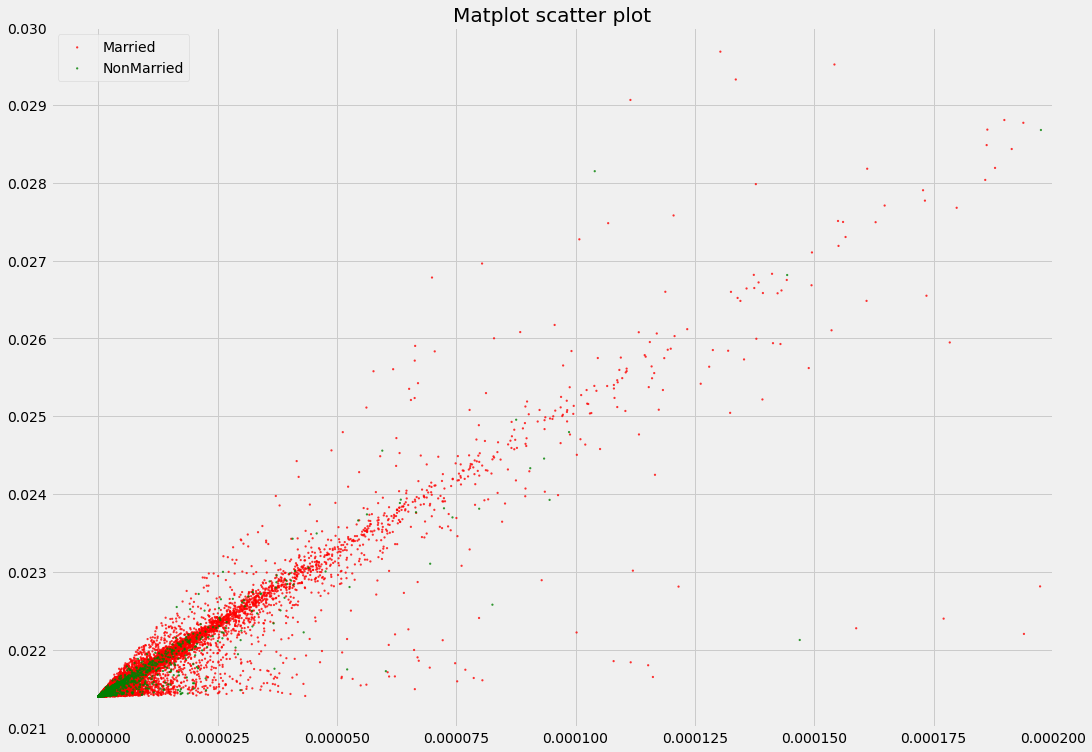

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 60
g1 = X_train_pca[y_train == 1]
g2 = X_train_pca[y_train == 0]

data = (g2, g1)
colors = ("red", "green")
groups = ("Married", "NonMarried")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
  print(type(data))
  print(len(data), len(g1), len(g2))
  x = data[:,0]
  y = data[:,1]
  ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=5, label=group)

plt.ylim(0.021, 0.030)
plt.xlim(-0.00001, 0.0002)
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

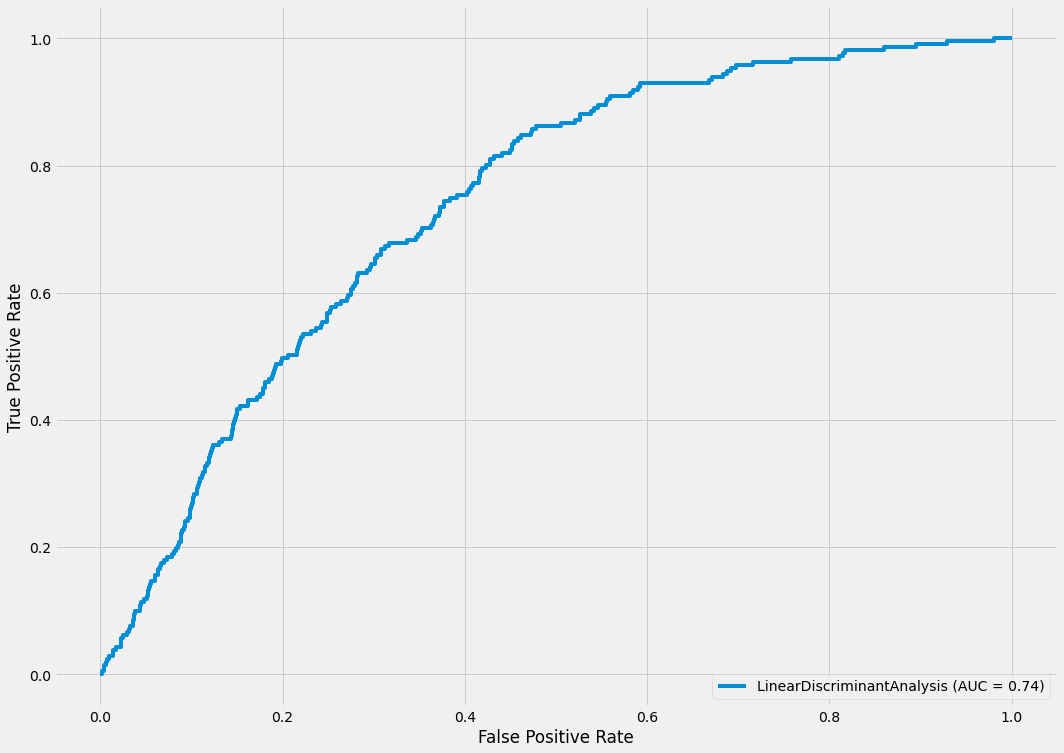

0.5011604784036401
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5789
           1       0.07      0.00      0.01       211

    accuracy                           0.96      6000
   macro avg       0.52      0.50      0.49      6000
weighted avg       0.93      0.96      0.95      6000



In [ ]:
from sklearn.metrics import plot_roc_curve, classification_report, roc_auc_score

rfc_disp = plot_roc_curve(clf, np.array(X_test), np.array(y_test))
plt.show()

print(roc_auc_score(y_test, clf.predict(np.array(X_test)), "weighted"))
print(classification_report(y_test, clf.predict(np.array(X_test))))

In [ ]:
params = {
          "depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
          "l2_leaf_reg": np.array(range(15, 51)) / 10,
          "model_size_reg": np.array(range(15, 51)) / 10,
          "border_count": [2, 4, 8, 16, 32, 64, 128, 254],
          "one_hot_max_size": [1, 2, 5, 10, 32, 64, 80, 96, 112, 128, None],
          "class_weights": [[1, 17], [1, 18], [1, 20], [1, 22], [1, 25], [1, 27], [1, 30]],
          "bagging_temperature": np.array(range(0, 31)) / 10,
          #"fold_len_multiplier": np.array(range(0, 11)) / 10,
          #"boosting_type": ["Ordered", "Plain"],
          "bootstrap_type": ["Bayesian", "Bernoulli"],
          "num_boost_round": [400],
          "leaf_estimation_iterations": np.array(range(1, 20)),
          "max_ctr_complexity": [5, 8, 10, 15, 25, 35, 40],
          "random_strength": np.array(range(0, 11)) / 10,
          "grow_policy": ["SymmetricTree", "Depthwise", "Lossguide"],
          "min_child_samples": [1, 2, 3, 5, 7, 10, 15, 20, 25],
          "learning_rate": [1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001],
          "loss_function" : ["Logloss", "CrossEntropy"]
          }

In [ ]:
np.prod([len(v) for k, v in params.items()])

144065479219200

In [ ]:
X_train_processed = X_train[importtantFeatures]
X_train_processed["processed0"] = X_train_pca[:, 0]
X_train_processed["processed1"] = X_train_pca[:, 1]

X_val_processed = X_val[importtantFeatures]
X_val_processed["processed0"] = X_val_pca[:, 0]
X_val_processed["processed1"] = X_val_pca[:, 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
X_train_processed

,islem_adedi_std_ICKILI_YERLER,ICKILI_YERLER_slope,aylik_toplam_tutar_std_KLP_DERNK_SOSY,islem_adedi_std_DIJITAL_URUNLR,KLP_DERNK_SOSY_slope,islem_adedi_std_BAHCE_CICEKCLK,islem_adedi_max_KLP_DERNK_SOSY,islem_adedi_std_KLP_DERNK_SOSY,islem_adedi_max_KUYUMCU,islem_adedi_sum_KLP_DERNK_SOSY,islem_adedi_std_KUYUMCU,DIJITAL_URUNLR_slope,aylik_toplam_tutar_count_KUYUMCU,islem_adedi_std_TURIZM_KONAKLM,islem_adedi_mean_KLP_DERNK_SOSY,KUYUMCU_slope,islem_adedi_count_KUYUMCU,aylik_toplam_tutar_std_KUYUMCU,islem_adedi_std_EGL_SPOR_HOBI,tarih_count_KUYUMCU,islem_adedi_mean_BAHCE_CICEKCLK,islem_adedi_mean_KUYUMCU,tarih_count_KLP_DERNK_SOSY,islem_adedi_sum_KUYUMCU,islem_adedi_sum_BAHCE_CICEKCLK,aylik_toplam_tutar_sum_DIJITAL_URUNLR,aylik_toplam_tutar_count_KLP_DERNK_SOSY,aylik_toplam_tutar_sum_KLP_DERNK_SOSY,islem_adedi_count_KLP_DERNK_SOSY,aylik_toplam_tutar_std_BAHCE_CICEKCLK,islem_adedi_max_TURIZM_KONAKLM,islem_adedi_mean_ICKILI_YERLER,aylik_toplam_tutar_max_KLP_DERNK_SOSY,tarih_count_BAHCE_CICEKCLK,islem_adedi_count_DIJITAL_URUNLR,islem_adedi_max_DIJITAL_URUNLR,aylik_toplam_tutar_std_ICKILI_YERLER,aylik_toplam_tutar_mean_DIJITAL_URUNLR,islem_adedi_sum_TURIZM_KONAKLM,islem_adedi_max_EGL_SPOR_HOBI,aylik_toplam_tutar_std_DIJITAL_URUNLR,islem_adedi_sum_TASIMACILIK,aylik_toplam_tutar_sum_KLP_DERNK_SOSY_ratio,islem_adedi_std_TASIMACILIK,islem_adedi_mean_TASIMACILIK,tarih_count_TURIZM_KONAKLM,islem_adedi_max_ELKT_ESYA_BILG,aylik_toplam_tutar_max_DIJITAL_URUNLR,islem_adedi_max_BAHCE_CICEKCLK,islem_adedi_sum_ELKT_ESYA_BILG,processed0,processed1
23638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-66667.489229,-13302.562548
23457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-66528.714532,-13149.783389
30463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.12132,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,10.0,0.0,4.0,0.0,6.0,0.0,0.447214,1.2,0.0,1.0,10.0,0.0,2.0,-63945.936086,-10792.315752
36051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-66687.310495,-13320.815772
42542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,3.0,-24453.401262,26800.350047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00000,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.0,0.0,0.0,2.0,-54149.496169,-3014.905402
28481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,0.0,0.0,0.0,0.0,-60205.925750,-6886.097516
863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,-57524.550407,-2029.323191
49440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,34957.319857,80875.716065


In [ ]:
currParams

{'bagging_temperature': 0.0,
 'bootstrap_type': 'Bayesian',
 'border_count': 2,
 'class_weights': [1, 17],
 'depth': 2,
 'grow_policy': 'SymmetricTree',
 'l2_leaf_reg': 1.5,
 'leaf_estimation_iterations': 0,
 'learning_rate': 1,
 'loss_function': 'Logloss',
 'max_ctr_complexity': 5,
 'min_child_samples': 1,
 'model_size_reg': 1.5,
 'num_boost_round': 400,
 'one_hot_max_size': 1,
 'random_strength': 0.0}

In [ ]:
import copy
from catboost.utils import get_roc_curve
from sklearn.metrics import auc

for i in params.keys():
  bestScore = 0
  bestParams = {}

  currParams = copy.deepcopy(bestParams)

  for j in range(len(params[i])):

    currParams[i] = params[i][j]

    try:
      catmodel = CatBoostClassifier(
          random_seed=42,
          use_best_model=True,
          silent = True,
          cat_features=categorical_features_indices,
          **currParams
      )

      catmodel.fit(
          X = X_train,
          y = y_train,
          eval_set=(X_val, y_val)
      )
      
      eval_pool = Pool(X_val, y_val, cat_features=categorical_features_indices)
      curve = get_roc_curve(catmodel, eval_pool)
      (fpr, tpr, thresholds) = curve
      roc_auc = auc(fpr, tpr)

      if roc_auc > bestScore:
        bestScore = roc_auc
        bestParams[i] = params[i][j]

        print("Found better parameters: ")
        print(bestParams)

        print("Best current score: ", bestScore)

    except:
      print(currParams, " did not work")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Found better parameters: 
{'depth': 2}
Best current score:  0.7536773046332871
Found better parameters: 
{'depth': 3}
Best current score:  0.7542212062626775
Found better parameters: 
{'depth': 6}
Best current score:  0.7554701887277143
Found better parameters: 
{'depth': 6, 'l2_leaf_reg': 1.5}
Best current score:  0.7542993979862817
Found better parameters: 
{'depth': 6, 'l2_leaf_reg': 1.9}
Best current score:  0.7557932769296466
Found better parameters: 
{'depth': 6, 'l2_leaf_reg': 2.1}
Best current score:  0.7572397195606918
Found better parameters: 
{'depth': 6, 'l2_leaf_reg': 2.1, 'model_size_reg': 1.5}
Best current score:  0.7533945633607345
Found better parameters: 
{'depth': 6, 'l2_leaf_reg': 2.1, 'model_size_reg': 1.9}
Best current score:  0.7537054536537845
Found better parameters: 
{'depth': 6, 'l2_leaf_reg': 2.1, 'model_size_reg': 2.0}
Best current score:  0.7539880906707057


In [ ]:
catmodel.best_score_

0.6501419071091725

In [ ]:
catmodel.best_params_

In [ ]:
catmodel = CatBoostClassifier(
    use_best_model=True,
    logging_level='Verbose',
    **{
        'bagging_temperature': 2.3,
        'bootstrap_type': 'Bayesian',
        'border_count': 128,
        'class_weights': [1, 17],
        'depth': 7,
        'grow_policy': 'Depthwise',
        'l2_leaf_reg': 4.1,
        'leaf_estimation_iterations': 9,
        'learning_rate': 0.01,
        'loss_function': 'Logloss',
        'max_ctr_complexity': 15,
        'min_child_samples': 15,
        'model_size_reg': 3.9,
        'num_boost_round': 400,
        'od_pval': 1e-10,
        'od_type': 'IncToDec',
        'od_wait': 10,
        'one_hot_max_size': 128,
        'random_strength': 0.6
       }
)

catmodel.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_val, y_val))

0:	learn: 0.6905103	test: 0.6909065	best: 0.6909065 (0)	total: 242ms	remaining: 1m 36s
1:	learn: 0.6882788	test: 0.6890097	best: 0.6890097 (1)	total: 434ms	remaining: 1m 26s
2:	learn: 0.6857122	test: 0.6866524	best: 0.6866524 (2)	total: 606ms	remaining: 1m 20s
3:	learn: 0.6833360	test: 0.6848661	best: 0.6848661 (3)	total: 834ms	remaining: 1m 22s
4:	learn: 0.6807374	test: 0.6827031	best: 0.6827031 (4)	total: 1.03s	remaining: 1m 21s
5:	learn: 0.6781453	test: 0.6803834	best: 0.6803834 (5)	total: 1.25s	remaining: 1m 21s
6:	learn: 0.6760212	test: 0.6786406	best: 0.6786406 (6)	total: 1.45s	remaining: 1m 21s
7:	learn: 0.6735513	test: 0.6764042	best: 0.6764042 (7)	total: 1.63s	remaining: 1m 19s
8:	learn: 0.6712590	test: 0.6745859	best: 0.6745859 (8)	total: 1.85s	remaining: 1m 20s
9:	learn: 0.6692524	test: 0.6729750	best: 0.6729750 (9)	total: 2.07s	remaining: 1m 20s
10:	learn: 0.6672789	test: 0.6712237	best: 0.6712237 (10)	total: 2.27s	remaining: 1m 20s
11:	learn: 0.6649198	test: 0.6691370	best

In [ ]:
importtantFeatures = np.array(catmodel.feature_names_)[catmodel.feature_importances_.argsort()][:50]
otherFeatures = np.array(catmodel.feature_names_)[catmodel.feature_importances_.argsort()][50:]

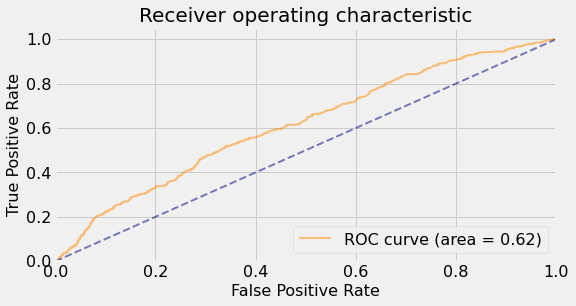

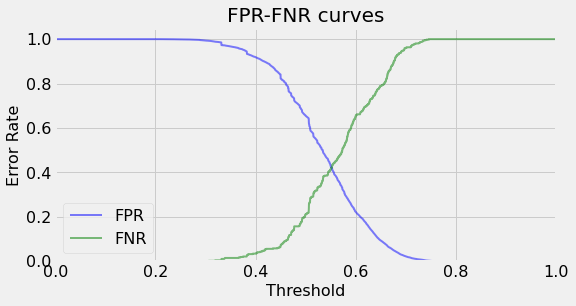

In [ ]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(X_test_pca, y_test, cat_features=categorical_features_indices)
curve = get_roc_curve(catmodel.best_estimator_, eval_pool)
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

metrics = catmodel.eval_metrics(
    data=eval_pool,
    metrics=['Accuracy',"Precision","Recall"],
    ntree_start=0,
    ntree_end=0,
    eval_period=1
)

roc_auc

plt.figure(figsize=(8, 4))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
3
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)

from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

plt.figure(figsize=(8, 4))

lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)

plt.show()

In [ ]:
np.savetxt("14022021_catmodeloptimized_v3.csv", np.rec.fromarrays([df_test.musteri, catmodel.best_estimator_.predict(df_test_merged)]), fmt= ["%s", "%d"], delimiter= ",", header= "musteri,target", comments="")

In [ ]:
from sklearn.metrics import fbeta_score,confusion_matrix,accuracy_score,f1_score,classification_report

cat_predictions_test = catmodel.predict(X_test_pca)

cat_acc_test = accuracy_score(y_test, cat_predictions_test)

print("Catboost Accuracy:"+str(cat_acc_test))

print("Confusion Matrix : \n", confusion_matrix(y_test, cat_predictions_test))
print(classification_report(y_test, cat_predictions_test, digits=4))

Catboost Accuracy:0.8126666666666666
Confusion Matrix : 
 [[4753 1036]
 [  88  123]]
              precision    recall  f1-score   support

           0     0.9818    0.8210    0.8943      5789
           1     0.1061    0.5829    0.1796       211

    accuracy                         0.8127      6000
   macro avg     0.5440    0.7020    0.5369      6000
weighted avg     0.9510    0.8127    0.8691      6000



In [ ]:
pd.set_option('display.max_rows', 150)

In [ ]:
catmodel.get_feature_importance(prettified=True)["Feature Id"].values

In [ ]:
np.savetxt("19022021_catoptimized_prob.csv", np.rec.fromarrays([df_test.musteri, catmodel.predict_proba(df_test_merged)[:, 1]]), fmt= ["%s", "%f"], delimiter= ",", header= "musteri,target", comments="")

In [ ]:
from sklearn.metrics import fbeta_score,confusion_matrix,accuracy_score,f1_score,classification_report

cat_predictions_test = catmodel.predict(X_test)

cat_acc_test = accuracy_score(y_test, cat_predictions_test)

print("Catboost Accuracy:"+str(cat_acc_test))

print("Confusion Matrix : \n", confusion_matrix(y_test, cat_predictions_test))
print(classification_report(y_test, cat_predictions_test, digits=4))

Catboost Accuracy:0.8126666666666666
Confusion Matrix : 
 [[4753 1036]
 [  88  123]]
              precision    recall  f1-score   support

           0     0.9818    0.8210    0.8943      5789
           1     0.1061    0.5829    0.1796       211

    accuracy                         0.8127      6000
   macro avg     0.5440    0.7020    0.5369      6000
weighted avg     0.9510    0.8127    0.8691      6000

